In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from konlpy.tag import Mecab
from Preprocess import load
from Preprocess.load import DataLoad
from Preprocess.preprocess import Preprocess
from Preprocess import preprocess
from Model.model import TfIdf

from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud 

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from matplotlib import rc  
rc('font', family='AppleGothic') 

In [2]:
loader = DataLoad(
    tran_path="../Data/csv/sample_transcripts.csv",
    meta_path="../Data/csv/sample_videos.csv"
)

In [3]:
texts_df_popular, texts_df_unpopular = loader.get_data_set(save=False)

stopwords = DataLoad.load_stopwords()
preprocessor = Preprocess(stopwords)

In [4]:
# popular_clean_df = preprocessor.get_cleaned_df(texts_df_popular, save=True, file_nm="popular_clean_df")
# unpopular_clean_df = preprocessor.get_cleaned_df(texts_df_unpopular, save=True, file_nm="unpopular_clean_df")

In [5]:
popular_clean_df = pd.read_csv("../Data/csv/popular_clean_df.csv", index_col=0)
unpopular_clean_df = pd.read_csv("../Data/csv/unpopular_clean_df.csv", index_col=0)

In [6]:
popular_list, unpopular_list, texts = preprocess.get_list_dataset(popular_clean_df, unpopular_clean_df)

In [7]:
df_po_tokenized = preprocessor.tokenize(popular_clean_df)
df_unpo_tokenized = preprocessor.tokenize(unpopular_clean_df)

In [8]:
total_po_nouns = list(itertools.chain(*[doc for doc in df_po_tokenized["text"]]))
total_unpo_nouns = list(itertools.chain(*[doc for doc in df_unpo_tokenized["text"]]))

In [308]:
po_nouns_counter = Counter(total_po_nouns)
top_po_nouns = dict(po_nouns_counter.most_common(100)) 

unpo_nouns_counter = Counter(total_unpo_nouns)
top_unpo_nouns = dict(unpo_nouns_counter.most_common(100))

In [10]:
def top_n_common_dict(top_n, counter):
    return dict(counter.most_common(top_n))

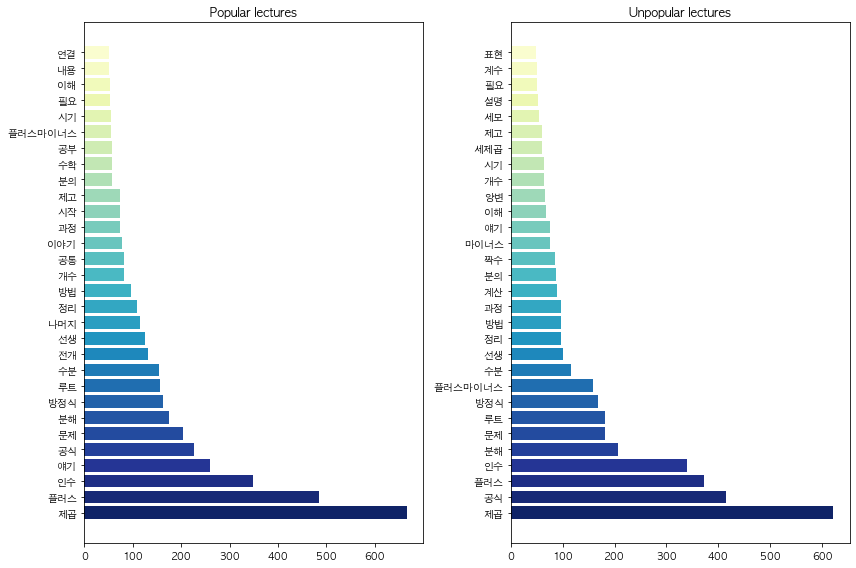

In [11]:
top_30_po_common = top_n_common_dict(30, po_nouns_counter)
top_30_unpo_common = top_n_common_dict(30, unpo_nouns_counter)

y_pos = np.arange(len(top_30_po_common)) 
colors = sns.color_palette('YlGnBu',len(top_30_po_common))[::-1]
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.barh(y_pos, top_30_po_common.values(), color=colors) 
plt.title('Popular lectures')
plt.yticks(y_pos, top_30_po_common.keys())


plt.subplot(1,2,2)
plt.barh(y_pos, top_30_unpo_common.values(), color=colors) 
plt.title('Unpopular lectures')
plt.yticks(y_pos, top_30_unpo_common.keys())


plt.tight_layout()
plt.show()

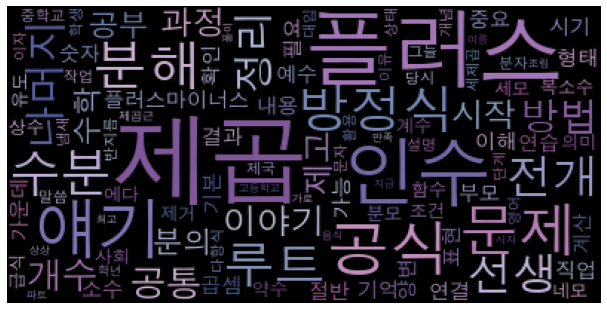

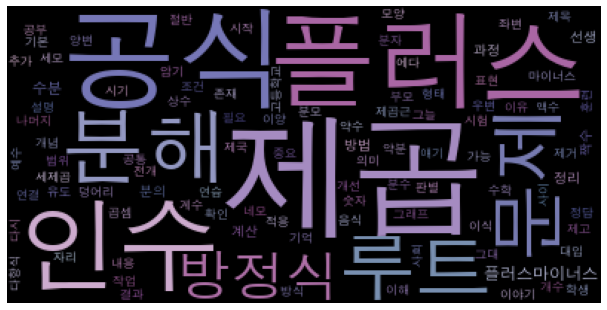

In [12]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))


wc = WordCloud(background_color = 'black', font_path='AppleGothic', color_func=color_func)
wc.generate_from_frequencies(top_n_common_dict(100, po_nouns_counter))

figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(2,1,1)
ax.axis('off')
ax.imshow(wc)

wc = WordCloud(background_color = 'black', font_path='AppleGothic', color_func=color_func)
wc.generate_from_frequencies(top_n_common_dict(100, unpo_nouns_counter))

figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(2,1,2)
ax.axis('off')
ax.imshow(wc)
plt.show()

In [13]:
math_list = loader.load_math_list()

In [14]:
popular_nouns = [doc for doc in df_po_tokenized["text"]]
unpopular_nouns = [doc for doc in df_unpo_tokenized["text"]]

new_po_nouns = [["수학" if noun in math_list else noun for noun in nouns] for nouns in popular_nouns]
new_unpo_nouns = [["수학" if noun in math_list else noun for noun in nouns] for nouns in unpopular_nouns]


In [290]:
total_new_po_nouns = list(itertools.chain(*new_po_nouns))
total_new_unpo_nouns = list(itertools.chain(*new_unpo_nouns))

new_po_count = Counter(total_new_po_nouns)
new_unpo_count = Counter(total_new_unpo_nouns)

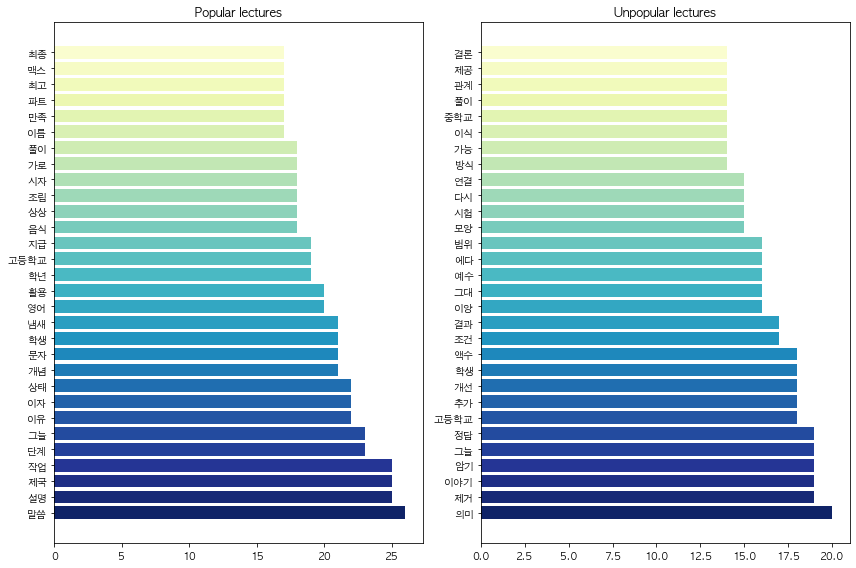

In [60]:
top_30_po_common = dict(new_po_count.most_common(70)[40:])
top_30_unpo_common = dict(new_unpo_count.most_common(70)[40:])

y_pos = np.arange(len(top_30_po_common)) 
colors = sns.color_palette('YlGnBu',len(top_30_po_common))[::-1]
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.barh(y_pos, top_30_po_common.values(), color=colors) 
plt.title('Popular lectures')
plt.yticks(y_pos, top_30_po_common.keys())


plt.subplot(1,2,2)
plt.barh(y_pos, top_30_unpo_common.values(), color=colors) 
plt.title('Unpopular lectures')
plt.yticks(y_pos, top_30_unpo_common.keys())


plt.tight_layout()
plt.show()

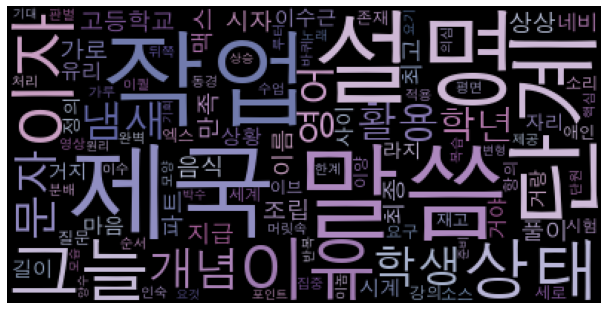

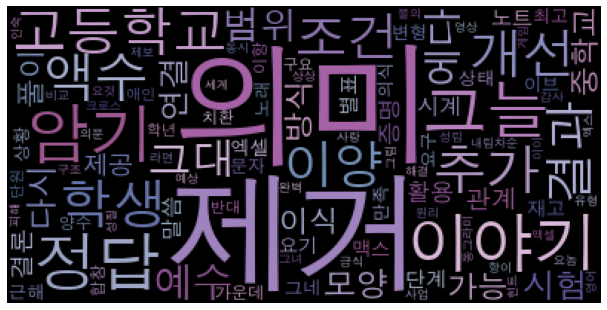

In [61]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))


wc = WordCloud(background_color = 'black', font_path='AppleGothic', color_func=color_func)
wc.generate_from_frequencies(dict(new_po_count.most_common(140)[40:]))

figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(2,1,1)
ax.axis('off')
ax.imshow(wc)

wc = WordCloud(background_color = 'black', font_path='AppleGothic', color_func=color_func)
wc.generate_from_frequencies(dict(new_unpo_count.most_common(140)[40:]))

figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(2,1,2)
ax.axis('off')
ax.imshow(wc)
plt.show()

---
## 각 단어가 강의를 나누는 상관성 (연관성) 파악하기

In [293]:
# Creating Dataframe for modeling
unique_list = list(set(itertools.chain(*new_po_nouns + new_unpo_nouns)))

words_df = pd.DataFrame(columns=unique_list, index=range(60)).fillna(0)

total_new_nouns = new_po_nouns + new_unpo_nouns
for idx in range(len(total_new_nouns)):
    for word in total_new_nouns[idx]:
        words_df.loc[idx, word] += 1

words_df["label"] = [1] * 30 + [0] * 30

<ipython-input-293-22b753f78e03>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  words_df["label"] = [1] * 30 + [0] * 30


### OLS

In [295]:
X = words_df.drop("label", axis=1)
y = words_df["label"]

X_ = sm.add_constant(X)

model = sm.OLS(y, X_)
model_trained = model.fit()

#view model summary
print(model_trained.summary())

/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                nan
Time:                        16:25:55   Log-Likelihood:                 1868.9
No. Observations:                  60   AIC:                            -3618.
Df Residuals:                       0   BIC:                            -3492.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0483        inf          0        n

### Linear Regression

In [296]:
lin_rg = LinearRegression()
lin_rg.fit(X, y)

LinearRegression()

### XGBoost

In [297]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model_xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

In [298]:
model_xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [299]:
df_impo = pd.DataFrame({'feature_importance': model_xgb.feature_importances_, 
              'feature_names': unique_list}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

<Figure size 576x432 with 0 Axes>

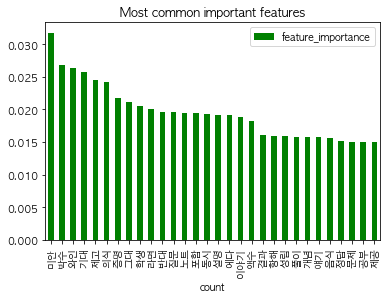

In [300]:
plt.figure(figsize=(8,6))
xgb_top_30 = df_impo.set_index("feature_names").sort_values(by=['feature_importance'], ascending=False)[:30]
xgb_top_30.plot(kind="bar",color='Green')
plt.title('Most common important features')
plt.xlabel('count')
plt.show()

## Important words 비교

In [301]:
def num_important_words(word_list):  
    num_mvp_words_po = len([word for sen in new_po_nouns for word in sen if word in word_list])
    num_mvp_words_unpo = len([word for sen in new_unpo_nouns for word in sen if word in word_list])

    print("인기 강좌에서 해당 단어가 나온 횟수 : {}".format(num_mvp_words_po))
    print("비인기 강좌에서 해당 단어가 나온 횟수 : {}".format(num_mvp_words_unpo))

In [302]:
df_corr_neg_30 = words_df.corr()["label"].sort_values(ascending=True).drop("label")[:30]
df_corr_pos_30 = words_df.corr()["label"].sort_values(ascending=False).drop("label")[:30]

lin_rg_coef = pd.Series(lin_rg.coef_, index=lin_rg.feature_names_in_)
lin_positive_30 = lin_rg_coef.sort_values(ascending=False)[:30]
lin_negative_30 = lin_rg_coef.sort_values(ascending=True)[:30]

ols_positive_30 = model_trained.params.sort_values(ascending=False)[:30]
ols_negative_30 = model_trained.params.sort_values(ascending=True)[:30]

In [303]:
# 토큰 빈도수 기준 양 & 음 상관관계
num_important_words(df_corr_pos_30)
print("="*50)
num_important_words(df_corr_neg_30)

인기 강좌에서 해당 단어가 나온 횟수 : 291
비인기 강좌에서 해당 단어가 나온 횟수 : 46
인기 강좌에서 해당 단어가 나온 횟수 : 70
비인기 강좌에서 해당 단어가 나온 횟수 : 274


In [304]:
# Linear Regression 회귀계수 양 & 음
num_important_words(lin_positive_30)
print("="*50)
num_important_words(lin_negative_30)

인기 강좌에서 해당 단어가 나온 횟수 : 1057
비인기 강좌에서 해당 단어가 나온 횟수 : 475
인기 강좌에서 해당 단어가 나온 횟수 : 634
비인기 강좌에서 해당 단어가 나온 횟수 : 743


In [305]:
# OLS 회귀계수 양 & 음
num_important_words(ols_positive_30)
print("="*50)
num_important_words(ols_negative_30)

인기 강좌에서 해당 단어가 나온 횟수 : 820
비인기 강좌에서 해당 단어가 나온 횟수 : 484
인기 강좌에서 해당 단어가 나온 횟수 : 482
비인기 강좌에서 해당 단어가 나온 횟수 : 660


In [250]:
# Linear Regression & OLS interaction
lin_ols_pos = (lin_positive_30.index).intersection((ols_positive_30.index))
lin_ols_neg = (lin_negative_30.index).intersection((ols_negative_30.index))

In [251]:
num_important_words(lin_ols_pos)
print("="*50)
num_important_words(lin_ols_neg)

인기 강좌에서 해당 단어가 나온 횟수 : 662
비인기 강좌에서 해당 단어가 나온 횟수 : 342
인기 강좌에서 해당 단어가 나온 횟수 : 353
비인기 강좌에서 해당 단어가 나온 횟수 : 459


---

## Feature_importance(XGboost) & intersections

In [262]:
# XGboost 
num_important_words(xgb_top_30.index)

인기 강좌에서 해당 단어가 나온 횟수 : 946
비인기 강좌에서 해당 단어가 나온 횟수 : 738


In [263]:
# intersections
lin_ols_xgb_po = (lin_ols_pos).intersection(xgb_top_30.index)
lin_ols_xgb_unpo = (lin_ols_neg).intersection(xgb_top_30.index)


In [307]:
lin_ols_xgb_po.tolist()

['이야기', '제고', '질문', '박수']

In [264]:
num_important_words(lin_ols_xgb_po)
print("="*50)
num_important_words(lin_ols_xgb_unpo)

인기 강좌에서 해당 단어가 나온 횟수 : 172
비인기 강좌에서 해당 단어가 나온 횟수 : 86
인기 강좌에서 해당 단어가 나온 횟수 : 28
비인기 강좌에서 해당 단어가 나온 횟수 : 43


In [265]:
important_word_dict_po = {}
for idx, sent in enumerate(popular_nouns):
    lec_dict = {}
    for word in lin_ols_xgb_po:
        num_words = sent.count(word)
        lec_dict[word] = num_words
    important_word_dict_po[idx] = lec_dict

In [266]:
important_word_dict_po

{0: {'이야기': 1, '제고': 0, '질문': 1, '박수': 0},
 1: {'이야기': 0, '제고': 0, '질문': 3, '박수': 0},
 2: {'이야기': 8, '제고': 2, '질문': 0, '박수': 0},
 3: {'이야기': 6, '제고': 4, '질문': 0, '박수': 0},
 4: {'이야기': 0, '제고': 0, '질문': 0, '박수': 0},
 5: {'이야기': 3, '제고': 2, '질문': 0, '박수': 0},
 6: {'이야기': 5, '제고': 2, '질문': 2, '박수': 0},
 7: {'이야기': 7, '제고': 1, '질문': 0, '박수': 0},
 8: {'이야기': 0, '제고': 16, '질문': 0, '박수': 0},
 9: {'이야기': 2, '제고': 3, '질문': 0, '박수': 0},
 10: {'이야기': 0, '제고': 1, '질문': 0, '박수': 1},
 11: {'이야기': 0, '제고': 2, '질문': 0, '박수': 0},
 12: {'이야기': 2, '제고': 0, '질문': 0, '박수': 1},
 13: {'이야기': 0, '제고': 6, '질문': 0, '박수': 0},
 14: {'이야기': 1, '제고': 0, '질문': 2, '박수': 0},
 15: {'이야기': 1, '제고': 1, '질문': 0, '박수': 1},
 16: {'이야기': 8, '제고': 3, '질문': 0, '박수': 0},
 17: {'이야기': 21, '제고': 9, '질문': 0, '박수': 0},
 18: {'이야기': 0, '제고': 0, '질문': 1, '박수': 0},
 19: {'이야기': 2, '제고': 1, '질문': 0, '박수': 1},
 20: {'이야기': 0, '제고': 4, '질문': 0, '박수': 1},
 21: {'이야기': 1, '제고': 0, '질문': 0, '박수': 1},
 22: {'이야기': 0, '제고': 2, '질문': 0, '박수': 

In [267]:
important_word_dict_unpo = {}
for idx, sent in enumerate(unpopular_nouns):
    lec_dict = {}
    for word in lin_ols_xgb_unpo:
        num_words = sent.count(word)
        lec_dict[word] = num_words
    important_word_dict_unpo[idx] = lec_dict

In [268]:
important_word_dict_unpo

{0: {'증명': 7, '그대': 0, '풀이': 0},
 1: {'증명': 0, '그대': 1, '풀이': 1},
 2: {'증명': 0, '그대': 1, '풀이': 0},
 3: {'증명': 0, '그대': 0, '풀이': 0},
 4: {'증명': 0, '그대': 0, '풀이': 0},
 5: {'증명': 1, '그대': 0, '풀이': 1},
 6: {'증명': 0, '그대': 0, '풀이': 2},
 7: {'증명': 0, '그대': 0, '풀이': 1},
 8: {'증명': 0, '그대': 1, '풀이': 0},
 9: {'증명': 0, '그대': 0, '풀이': 2},
 10: {'증명': 0, '그대': 0, '풀이': 0},
 11: {'증명': 0, '그대': 1, '풀이': 0},
 12: {'증명': 0, '그대': 0, '풀이': 0},
 13: {'증명': 0, '그대': 0, '풀이': 1},
 14: {'증명': 0, '그대': 0, '풀이': 0},
 15: {'증명': 1, '그대': 1, '풀이': 0},
 16: {'증명': 1, '그대': 0, '풀이': 1},
 17: {'증명': 0, '그대': 0, '풀이': 0},
 18: {'증명': 0, '그대': 1, '풀이': 0},
 19: {'증명': 0, '그대': 0, '풀이': 0},
 20: {'증명': 0, '그대': 2, '풀이': 1},
 21: {'증명': 0, '그대': 0, '풀이': 2},
 22: {'증명': 1, '그대': 0, '풀이': 0},
 23: {'증명': 1, '그대': 0, '풀이': 0},
 24: {'증명': 0, '그대': 6, '풀이': 0},
 25: {'증명': 0, '그대': 1, '풀이': 1},
 26: {'증명': 0, '그대': 1, '풀이': 0},
 27: {'증명': 0, '그대': 0, '풀이': 1},
 28: {'증명': 0, '그대': 0, '풀이': 0},
 29: {'증명': 1, '그대': 0, 

## TFIDF predictions

In [269]:
from Model.model import TfIdf

In [270]:
tfidf = TfIdf(
    texts=texts,
    tokenizer=preprocess.tokenizer
)

popular_tfidf, unpopular_tfidf = tfidf.transform_into_vector(popular_list, unpopular_list)

tfidf_df = pd.concat([pd.DataFrame(popular_tfidf), pd.DataFrame(unpopular_tfidf)])
tfidf_df["label"] = [1] * 30 + [0] * 30

/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [271]:
from sklearn.linear_model import LinearRegression

X = tfidf_df.drop("label", axis=1)
y = tfidf_df["label"]

lin_rg = LinearRegression()

lin_rg.fit(X, y)

LinearRegression()

In [272]:
X_ = sm.add_constant(X)

model = sm.OLS(y, X_)
model_trained_tfidf = model.fit()

print(model_trained_tfidf.summary())

/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                nan
Time:                        15:54:03   Log-Likelihood:                 1928.5
No. Observations:                  60   AIC:                            -3737.
Df Residuals:                       0   BIC:                            -3611.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6902        inf          0        n

In [273]:
word_list = tfidf.tfidf_vectorizer.get_feature_names_out().tolist()

tfidf_lin_rg_coef = pd.Series(lin_rg.coef_, index=word_list)
tfidf_lin_positive_30 = tfidf_lin_rg_coef.sort_values(ascending=False)[:30]
tfidf_lin_negative_30 = tfidf_lin_rg_coef.sort_values(ascending=True)[:30]

tfidf_ols_coef = pd.Series(model_trained_tfidf.params.drop("const").values, index=word_list)
tfidf_ols_positive_30 = tfidf_ols_coef.sort_values(ascending=False)[:30]
tfidf_ols_negative_30 = tfidf_ols_coef.sort_values(ascending=True)[:30]

In [274]:
num_important_words(tfidf_lin_positive_30.index)
print("="*50)
num_important_words(tfidf_lin_negative_30.index)

인기 강좌에서 해당 단어가 나온 횟수 : 1807
비인기 강좌에서 해당 단어가 나온 횟수 : 1020
인기 강좌에서 해당 단어가 나온 횟수 : 1227
비인기 강좌에서 해당 단어가 나온 횟수 : 2045


In [275]:
# intersections
tfidf_lin_ols_po = (tfidf_lin_positive_30.index).intersection(tfidf_ols_positive_30.index)
tfidf_lin_ols_unpo = (tfidf_lin_negative_30.index).intersection(tfidf_ols_negative_30.index)

In [276]:
num_important_words(tfidf_lin_ols_po)
print("="*50)
num_important_words(tfidf_lin_ols_unpo)

인기 강좌에서 해당 단어가 나온 횟수 : 1785
비인기 강좌에서 해당 단어가 나온 횟수 : 1017
인기 강좌에서 해당 단어가 나온 횟수 : 1227
비인기 강좌에서 해당 단어가 나온 횟수 : 2045


In [277]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model_xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=8, random_state=42)

model_xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [278]:
df_impo = pd.DataFrame({'feature_importance': model_xgb.feature_importances_, 
              'feature_names': word_list}).sort_values(by=['feature_importance'], 
                                                       ascending=False)

<Figure size 576x432 with 0 Axes>

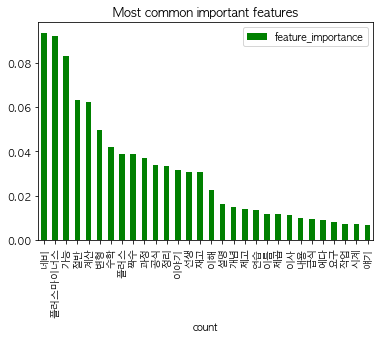

In [279]:
plt.figure(figsize=(8,6))
xgb_top_30 = df_impo.set_index("feature_names").sort_values(by=['feature_importance'], ascending=False)[:30]
xgb_top_30.plot(kind="bar",color='Green')
plt.title('Most common important features')
plt.xlabel('count')
plt.show()

In [280]:
# intersections
tfidf_lin_ols_xgb_po = (tfidf_lin_ols_po).intersection(xgb_top_30.index)
tfidf_lin_ols_xgb_unpo = (tfidf_lin_ols_unpo).intersection(xgb_top_30.index)

In [281]:
tfidf_lin_ols_xgb_po

Index(['얘기', '네비', '급식', '가능', '수학', '이야기', '제곱', '내용'], dtype='object')

In [282]:
tfidf_lin_ols_xgb_unpo

Index(['계산', '과정', '공식', '짝수', '플러스마이너스', '정리', '개념', '설명'], dtype='object')

In [283]:
num_important_words(tfidf_lin_ols_xgb_po)
print("="*50)
num_important_words(tfidf_lin_ols_xgb_unpo)

인기 강좌에서 해당 단어가 나온 횟수 : 1189
비인기 강좌에서 해당 단어가 나온 횟수 : 800
인기 강좌에서 해당 단어가 나온 횟수 : 565
비인기 강좌에서 해당 단어가 나온 횟수 : 1037


In [284]:
lin_ols_xgb_po

Index(['이야기', '제고', '질문', '박수'], dtype='object')

In [285]:
lin_ols_xgb_unpo

Index(['증명', '그대', '풀이'], dtype='object')

In [286]:
tfidf_lin_ols_xgb_po

Index(['얘기', '네비', '급식', '가능', '수학', '이야기', '제곱', '내용'], dtype='object')

In [287]:
tfidf_lin_ols_xgb_unpo

Index(['계산', '과정', '공식', '짝수', '플러스마이너스', '정리', '개념', '설명'], dtype='object')